# Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Data Reading

In [34]:
dataset = pd.read_csv("data.csv")
dataset.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393


In [35]:
dataset = dataset.drop(["id", "date"],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 2.5 MB


In [36]:
for value in dataset:
    print('For {} = {} unique values present'.format(value,dataset[value].nunique()))

For price = 4028 unique values present
For bedrooms = 13 unique values present
For bathrooms = 30 unique values present
For sqft_living = 1038 unique values present
For sqft_lot = 9782 unique values present
For floors = 6 unique values present
For condition = 5 unique values present
For grade = 12 unique values present
For sqft_above = 946 unique values present
For sqft_basement = 306 unique values present
For yr_built = 116 unique values present
For yr_renovated = 70 unique values present
For zipcode = 70 unique values present
For lat = 5034 unique values present
For long = 752 unique values present


In [37]:
for col in dataset.columns:
    dataset[col] = dataset[col].astype(int)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,0,98178,47,-122
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,1991,98125,47,-122
2,180000,2,1,770,10000,1,3,6,770,0,1933,0,98028,47,-122
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,0,98136,47,-122
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,0,98074,47,-122


# Plotting Relations

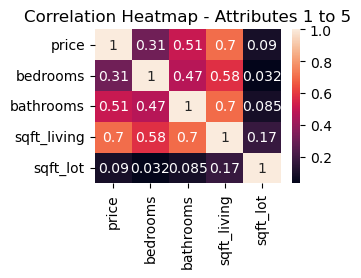

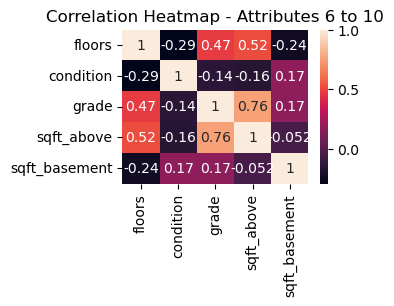

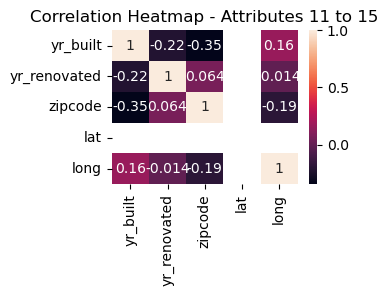

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = {col: dataset[col].tolist() for col in dataset.columns}
attributes_per_heatmap = 5
column_names = list(dataset.columns)

for i in range(0, len(column_names), attributes_per_heatmap):
    subset_columns = column_names[i:i + attributes_per_heatmap]
    subset_df = dataset[subset_columns]
    
    # Adjusting the figure size to 5x4
    plt.figure(figsize=(3,2))
    
    sns.heatmap(subset_df.corr(), annot=True)
    plt.title(f'Correlation Heatmap - Attributes {i+1} to {i+attributes_per_heatmap}')
    plt.show()


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          21613 non-null  int32
 1   bedrooms       21613 non-null  int32
 2   bathrooms      21613 non-null  int32
 3   sqft_living    21613 non-null  int32
 4   sqft_lot       21613 non-null  int32
 5   floors         21613 non-null  int32
 6   condition      21613 non-null  int32
 7   grade          21613 non-null  int32
 8   sqft_above     21613 non-null  int32
 9   sqft_basement  21613 non-null  int32
 10  yr_built       21613 non-null  int32
 11  yr_renovated   21613 non-null  int32
 12  zipcode        21613 non-null  int32
 13  lat            21613 non-null  int32
 14  long           21613 non-null  int32
dtypes: int32(15)
memory usage: 1.2 MB


Top 7 Correlated Attributes:
1. sqft_living -- Correlation: 0.70
2. grade -- Correlation: 0.67
3. sqft_above -- Correlation: 0.61
4. bathrooms -- Correlation: 0.51
5. sqft_basement -- Correlation: 0.32
6. bedrooms -- Correlation: 0.31
7. floors -- Correlation: 0.24
Enter the number corresponding to the column: 1


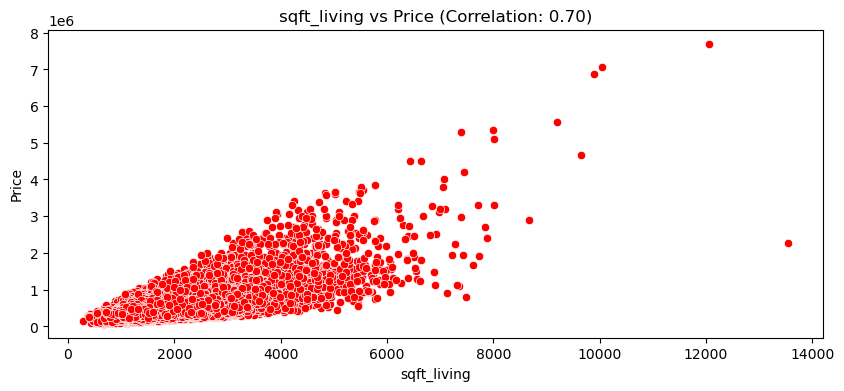

In [40]:
correlation_matrix = dataset.corr()
top_correlated_attributes = correlation_matrix['price'].abs().sort_values(ascending=False)[1:8]

print("Top 7 Correlated Attributes:")
for i, (column, correlation) in enumerate(top_correlated_attributes.items(), start=1):
    print(f"{i}. {column} -- Correlation: {correlation:.2f}")

while True:
    try:
        choice = int(input("Enter the number corresponding to the column: "))
        if 1 <= choice <= len(top_correlated_attributes):
            selected_column = top_correlated_attributes.index[choice - 1]
            break
        else:
            print("Invalid choice. Please enter a number within the specified range.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

plt.figure(figsize=(10,4))
sns.scatterplot(x=selected_column, y='price', data=dataset, color='red')
plt.title(f'{selected_column} vs Price (Correlation: {correlation_matrix.loc[selected_column, "price"]:.2f})')
plt.xlabel(selected_column)
plt.ylabel('Price')
plt.show()


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          21613 non-null  int32
 1   bedrooms       21613 non-null  int32
 2   bathrooms      21613 non-null  int32
 3   sqft_living    21613 non-null  int32
 4   sqft_lot       21613 non-null  int32
 5   floors         21613 non-null  int32
 6   condition      21613 non-null  int32
 7   grade          21613 non-null  int32
 8   sqft_above     21613 non-null  int32
 9   sqft_basement  21613 non-null  int32
 10  yr_built       21613 non-null  int32
 11  yr_renovated   21613 non-null  int32
 12  zipcode        21613 non-null  int32
 13  lat            21613 non-null  int32
 14  long           21613 non-null  int32
dtypes: int32(15)
memory usage: 1.2 MB


Dropping unwanted columns

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

top_correlated_attributes = correlation_matrix['price'].abs().sort_values(ascending=False)[1:8].index.tolist()
columns_to_drop = [col for col in dataset.columns if col not in top_correlated_attributes and col != 'price']
dataset = dataset.drop(columns=columns_to_drop, axis=1)

print("\nModified Dataset:")
print(dataset.head().to_string(index=False))



Modified Dataset:
 price  bedrooms  bathrooms  sqft_living  floors  grade  sqft_above  sqft_basement
221900         3          1         1180       1      7        1180              0
538000         3          2         2570       2      7        2170            400
180000         2          1          770       1      6         770              0
604000         4          3         1960       1      7        1050            910
510000         3          2         1680       1      8        1680              0


In [11]:
top_10_prices = dataset.nlargest(5, 'price')
print("\nTop 5 Prices and Attributes:")
print(top_10_prices.to_string(index=False))

least_10_prices = dataset.nsmallest(5, 'price')
print("\nLeast 5 Prices and Attributes:")
print(least_10_prices.to_string(index=False))



Top 5 Prices and Attributes:
  price  bedrooms  bathrooms  sqft_living  floors  grade  sqft_above  sqft_basement
7700000         6          8        12050       2     13        8570           3480
7062500         5          4        10040       2     11        7680           2360
6885000         6          7         9890       2     13        8860           1030
5570000         5          5         9200       2     13        6200           3000
5350000         5          5         8000       2     12        6720           1280

Least 5 Prices and Attributes:
 price  bedrooms  bathrooms  sqft_living  floors  grade  sqft_above  sqft_basement
 75000         1          0          670       1      3         670              0
 78000         2          1          780       1      5         780              0
 80000         1          0          430       1      4         430              0
 81000         2          1          730       1      5         730              0
 82000         3   

# Statistical Analysis

In [12]:
stats_before = dataset.describe(include=[np.number], percentiles=[.5]).transpose().drop("count", axis=1)
print(stats_before)

                        mean            std      min       50%        max
price          540088.141767  367127.196483  75000.0  450000.0  7700000.0
bedrooms            3.370842       0.930062      0.0       3.0       33.0
bathrooms           1.749734       0.734873      0.0       2.0        8.0
sqft_living      2079.899736     918.440897    290.0    1910.0    13540.0
floors              1.446213       0.551894      1.0       1.0        3.0
grade               7.656873       1.175459      1.0       7.0       13.0
sqft_above       1788.390691     828.090978    290.0    1560.0     9410.0
sqft_basement     291.509045     442.575043      0.0       0.0     4820.0


In [13]:
num_missing = dataset.isna().sum()
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / dataset.shape[0]
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)
print(num_missing)
print("Execution completed")

Series([], dtype: int64)
Execution completed


Outliers Detection using Z score 

In [14]:
def detect_outliers(dataset):
    # Step 1: Calculate mean and standard deviation for numeric columns
    numeric_columns = dataset.select_dtypes(include=[np.number])
    mean_value = numeric_columns.mean()
    std_dev = numeric_columns.std()

    # Step 2: Compute Z-scores for each data point
    z_scores = (numeric_columns - mean_value) / std_dev

    # Step 3: Set a threshold (e.g., Z > 3 or Z < -3)
    threshold = 3

    # Step 4: Identify outliers
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    
    percentage_outliers = (outliers.sum() / len(dataset)) * 100
    print("Dataset Length:", len(dataset))
    print("Outliers Count:", outliers.sum())
    print("Percentage of Outliers:", f"{percentage_outliers:.2f}%")
    return outliers

outliers = detect_outliers(dataset)

Dataset Length: 21613
Outliers Count: 998
Percentage of Outliers: 4.62%


Available columns in the dataset:
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
Enter the column for the scatter plot: bedrooms


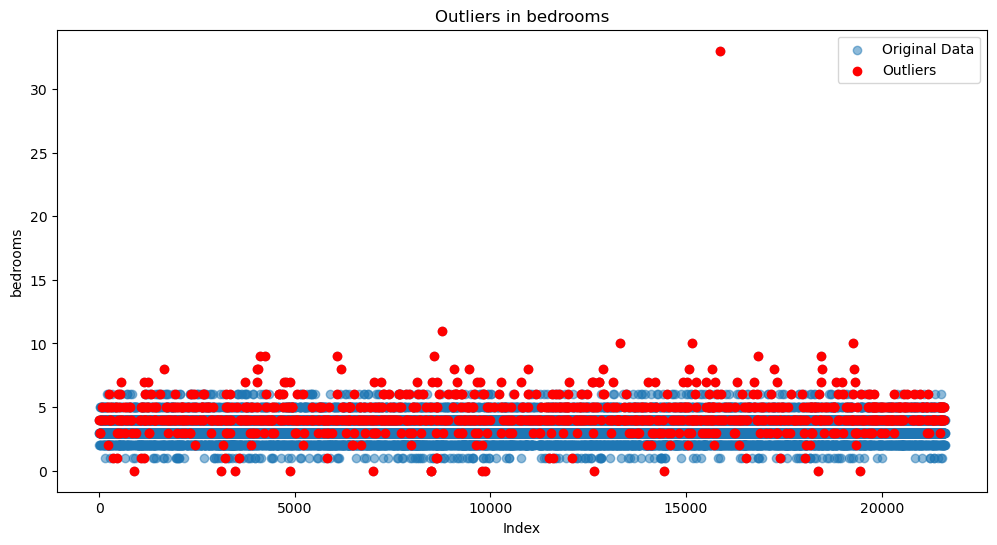

In [41]:
print("Available columns in the dataset:")
for col in dataset.columns:
    print(col)
    
while True:
    selected_column = input("Enter the column for the scatter plot: ")
    if selected_column in dataset.columns:
        plt.figure(figsize=(12, 6))
        plt.scatter(dataset.index, dataset[selected_column], label='Original Data', alpha=0.5)
        plt.scatter(dataset[outliers].index, dataset[outliers][selected_column], color='red', label='Outliers')
        plt.title(f'Outliers in {selected_column}')
        plt.xlabel('Index')
        plt.ylabel(selected_column)
        plt.legend()
        plt.show()
        break
    else:
        print(f"Column '{selected_column}' not found in the dataset. Please enter a valid column name.")


# Handling Outliers

Imputation

In [42]:
for column in dataset.columns:
    median_value = dataset[column].median()
    dataset.loc[outliers, column] = median_value

Available columns in the dataset:
1. price
2. bedrooms
3. bathrooms
4. sqft_living
5. sqft_lot
6. floors
7. condition
8. grade
9. sqft_above
10. sqft_basement
11. yr_built
12. yr_renovated
13. zipcode
14. lat
15. long
Enter the number corresponding to the column for the scatter plot: 2


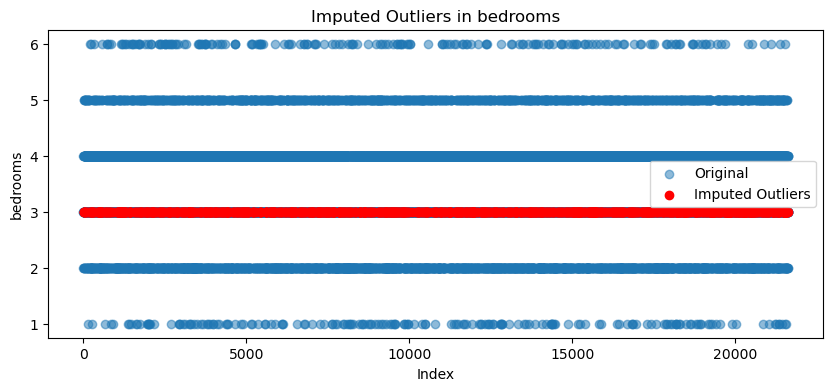

In [43]:
print("Available columns in the dataset:")
for i, col in enumerate(dataset.columns, start=1):
    print(f"{i}. {col}")
    
while True:
    try:
        choice = int(input("Enter the number corresponding to the column for the scatter plot: "))
        if 1 <= choice <= len(dataset.columns):
            selected_column = dataset.columns[choice - 1]
            plt.figure(figsize=(10, 4))
            plt.scatter(dataset.index, dataset[selected_column], label='Original', alpha=0.5)
            plt.scatter(dataset[outliers].index, dataset[outliers][selected_column], color='red', label='Imputed Outliers')
            plt.title(f'Imputed Outliers in {selected_column}')
            plt.xlabel('Index')
            plt.ylabel(selected_column)
            plt.legend()
            plt.show()
            break  
        else:
            print("Invalid choice. Please enter a number within the specified range.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")


In [18]:
stats_after = dataset.describe(include=[np.number], percentiles=[.5]).transpose().drop("count", axis=1)
print(stats_after)

                        mean            std      min       50%        max
price          492581.733216  238667.331821  78000.0  450000.0  1640000.0
bedrooms            3.305094       0.832774      1.0       3.0        6.0
bathrooms           1.696572       0.625811      0.0       2.0        3.0
sqft_living      1973.859483     734.999607    370.0    1910.0     4800.0
floors              1.412576       0.544608      1.0       1.0        3.0
grade               7.534077       1.029550      5.0       7.0       11.0
sqft_above       1705.386295     698.556378    370.0    1560.0     4270.0
sqft_basement     252.311618     391.166600      0.0       0.0     1610.0


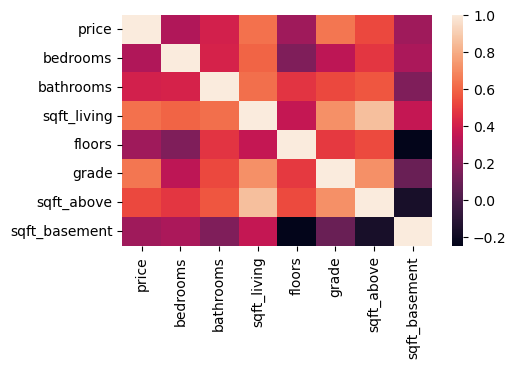

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(dataset.corr(), ax=ax);

# Feature Scaling

In [20]:
scaler = StandardScaler()
target_column = 'price'
X = dataset.drop(target_column, axis=1)
y = dataset[target_column]

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=0)

# Models Training

***Multiple Linear Regression***

In [22]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)
mlr_r2 = r2_score(y_test, mlr_pred)

***Decision Tree***

In [23]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train, y_train)
tr_pred = tr_regressor.predict(X_test)
tr_r2 = r2_score(y_test, tr_pred)

***Random Forest Regression Model***

In [24]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

***Ridge Regression Model***

In [25]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)
ridge_pred = ridge_regressor.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)

***K-Nearest Neighbours***

In [26]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
knn_pred = knn_regressor.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)

***Calulate Model Scores***

In [27]:
models_score = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Decision Tree', 'Random Forest Regression', 'K-Nearest Neighbors', 'Ridge Regression'],
    'Score': [mlr_r2, tr_r2, rf_r2, knn_r2, ridge_r2],
    'R-squared': [mlr_r2, tr_r2, rf_r2, knn_r2, ridge_r2]
})

models_score = models_score.sort_values(by='R-squared', ascending=False)

print("\nModels Scores:")
print(models_score)


Models Scores:
                        Model     Score  R-squared
0  Multiple Linear Regression  0.501745   0.501745
4            Ridge Regression  0.501740   0.501740
3         K-Nearest Neighbors  0.468719   0.468719
2    Random Forest Regression  0.460781   0.460781
1               Decision Tree  0.202211   0.202211


# Prediction

In [28]:
def predict_house_price(features):
    best_model = None
    r2_scores = {
        'Multiple Linear Regression': mlr_r2,
        'Decision Tree': tr_r2,
        'Random Forest Regression': rf_r2,
        'K-Nearest Neighbors': knn_r2,
        'Ridge Regression': ridge_r2
    }

    best_model_name = max(r2_scores, key=r2_scores.get)
    best_model = None

    if best_model_name == 'Multiple Linear Regression':
        best_model = mlr
    elif best_model_name == 'Decision Tree':
        best_model = tr_regressor
    elif best_model_name == 'Random Forest Regression':
        best_model = rf_regressor
    elif best_model_name == 'K-Nearest Neighbors':
        best_model = knn_regressor
    elif best_model_name == 'Ridge Regression':
        best_model = ridge_regressor

    prediction_dollars = (best_model.predict([features])[0].round(2))/100
    exchange_rate = 83.32
    prediction_rupees = prediction_dollars * exchange_rate

    return prediction_dollars, prediction_rupees


In [29]:
def get_user_input():
    features = []
    for i in dataset.columns[1:]:
        while True:
            try:
                if i == 'grade':
                    print("Grade ranges from 1 to 13 ")
                    feature_value = float(input(f"Enter {i}: "))
                    if not (1 <= feature_value <= 13):
                        raise ValueError("Grade must be between 1 and 13.")
                else:
                    feature_value = float(input(f"Enter {i}: "))
                features.append(feature_value)
                break
            except ValueError:
                print("Invalid input. Please enter a valid numeric value.")
    
    return features


In [31]:
user_input_features = get_user_input()
pred_dollars, pred_rupees = predict_house_price(user_input_features)

print(f"Predicted House Price: {pred_dollars.round(2)} Dollars")


KeyboardInterrupt: Interrupted by user